In [97]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from sklearn.preprocessing import RobustScaler


df = pd.read_csv('Housing.csv')

In [98]:
# Changing categorical values into 0 and 1
le = LabelEncoder()
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                   'airconditioning', 'prefarea', 'furnishingstatus']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

df.tail()
#0 -> furnished  , 1 -> semi-furnished  , 2 -> non-furnished

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0
544,1750000,3850,3,1,2,1,0,0,0,0,0,0,2


In [109]:
# Splitting data set into train and test
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.13, random_state=32)


In [ ]:
# Training the random forest model
rf_model = RandomForestRegressor(n_estimators=400,max_depth=13,random_state=32, min_samples_split=7, min_samples_leaf=2, bootstrap=True, oob_score=False)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("R^2 is",rf_model.score(X_test,y_test))



R^2 is 0.7658439412748637


In [124]:
# calculating the mse, rmse and r^2 
from sklearn.metrics import mean_squared_error, r2_score

def calculate_metrics(y_true, y_pred):
   mse = mean_squared_error(y_true, y_pred)
   rmse = np.sqrt(mse)
   r2 = r2_score(y_true, y_pred)
   
   print(f"Mean Squared Error (MSE): {mse:.4f}")
   print(f"Root Mean Squared Error (RMSE): {rmse:.4f}") 
   print(f"R-squared (R2) Score: {r2:.4f}")
   
   return mse, rmse, r2

mse, rmse, r2 = calculate_metrics(y_test, rf_pred)


Mean Squared Error (MSE): 722017811357.2987
Root Mean Squared Error (RMSE): 849716.3123
R-squared (R2) Score: 0.7658


In [115]:

# Saving the results into data frame
results_df = pd.DataFrame({
    'Actual Price': y_test.values,
    'Predicted Price': rf_pred
}).sort_values(by='Actual Price')

results_df.head(10)

,Actual Price,Predicted Price
47,2408000,2.659286e+06
67,2450000,3.381682e+06
20,2590000,4.998301e+06
52,2660000,2.736855e+06
64,2800000,3.370149e+06
12,2870000,2.603638e+06
18,3150000,4.379466e+06
0,3220000,3.326683e+06
21,3220000,3.033760e+06
45,3255000,3.593453e+06


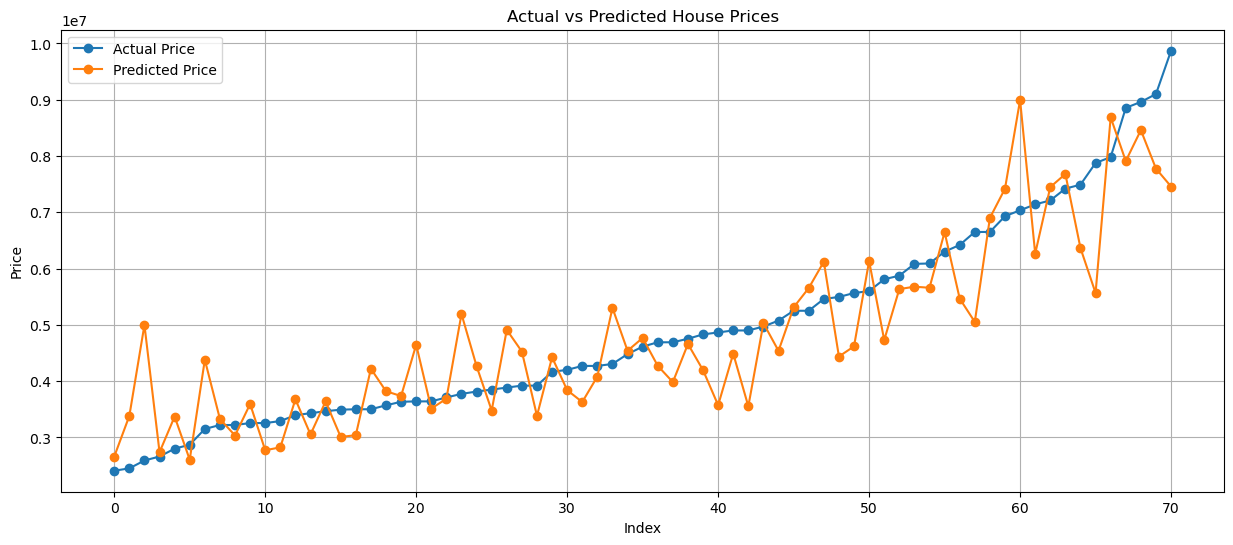

In [116]:
# Plotting the grapgh actual vs predicted value
plt.figure(figsize=(15, 6))
plt.plot(range(len(results_df)), results_df['Actual Price'], label='Actual Price', marker='o')
plt.plot(range(len(results_df)), results_df['Predicted Price'], label='Predicted Price', marker='o')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.grid(True)
plt.show()

In [127]:

print("\nPrice comparison for first 10 house")
comparison_df = pd.DataFrame({
    'Actual Price': y_test.iloc[:10],
    'Predicted Price': rf_pred[:10],
    'Difference': y_test.iloc[:10] - rf_pred[:10],
    '% Difference': ((y_test.iloc[:10] - rf_pred[:10]) / y_test.iloc[:10] * 100).round(2)
})
comparison_df


Price comparison for first 10 house


,Actual Price,Predicted Price,Difference,% Difference
443,3220000,3.326683e+06,-1.066828e+05,-3.31
128,5873000,5.634601e+06,2.383992e+05,4.06
79,6650000,6.898277e+06,-2.482767e+05,-3.73
348,3815000,4.265922e+06,-4.509224e+05,-11.82
335,3920000,4.525419e+06,-6.054194e+05,-15.44
334,3920000,3.383223e+06,5.367769e+05,13.69
65,6930000,7.419179e+06,-4.891790e+05,-7.06
94,6300000,6.647511e+06,-3.475113e+05,-5.52
17,8960000,8.459243e+06,5.007570e+05,5.59
16,9100000,7.775449e+06,1.324551e+06,14.56


In [121]:
import pickle

# Saving the model
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

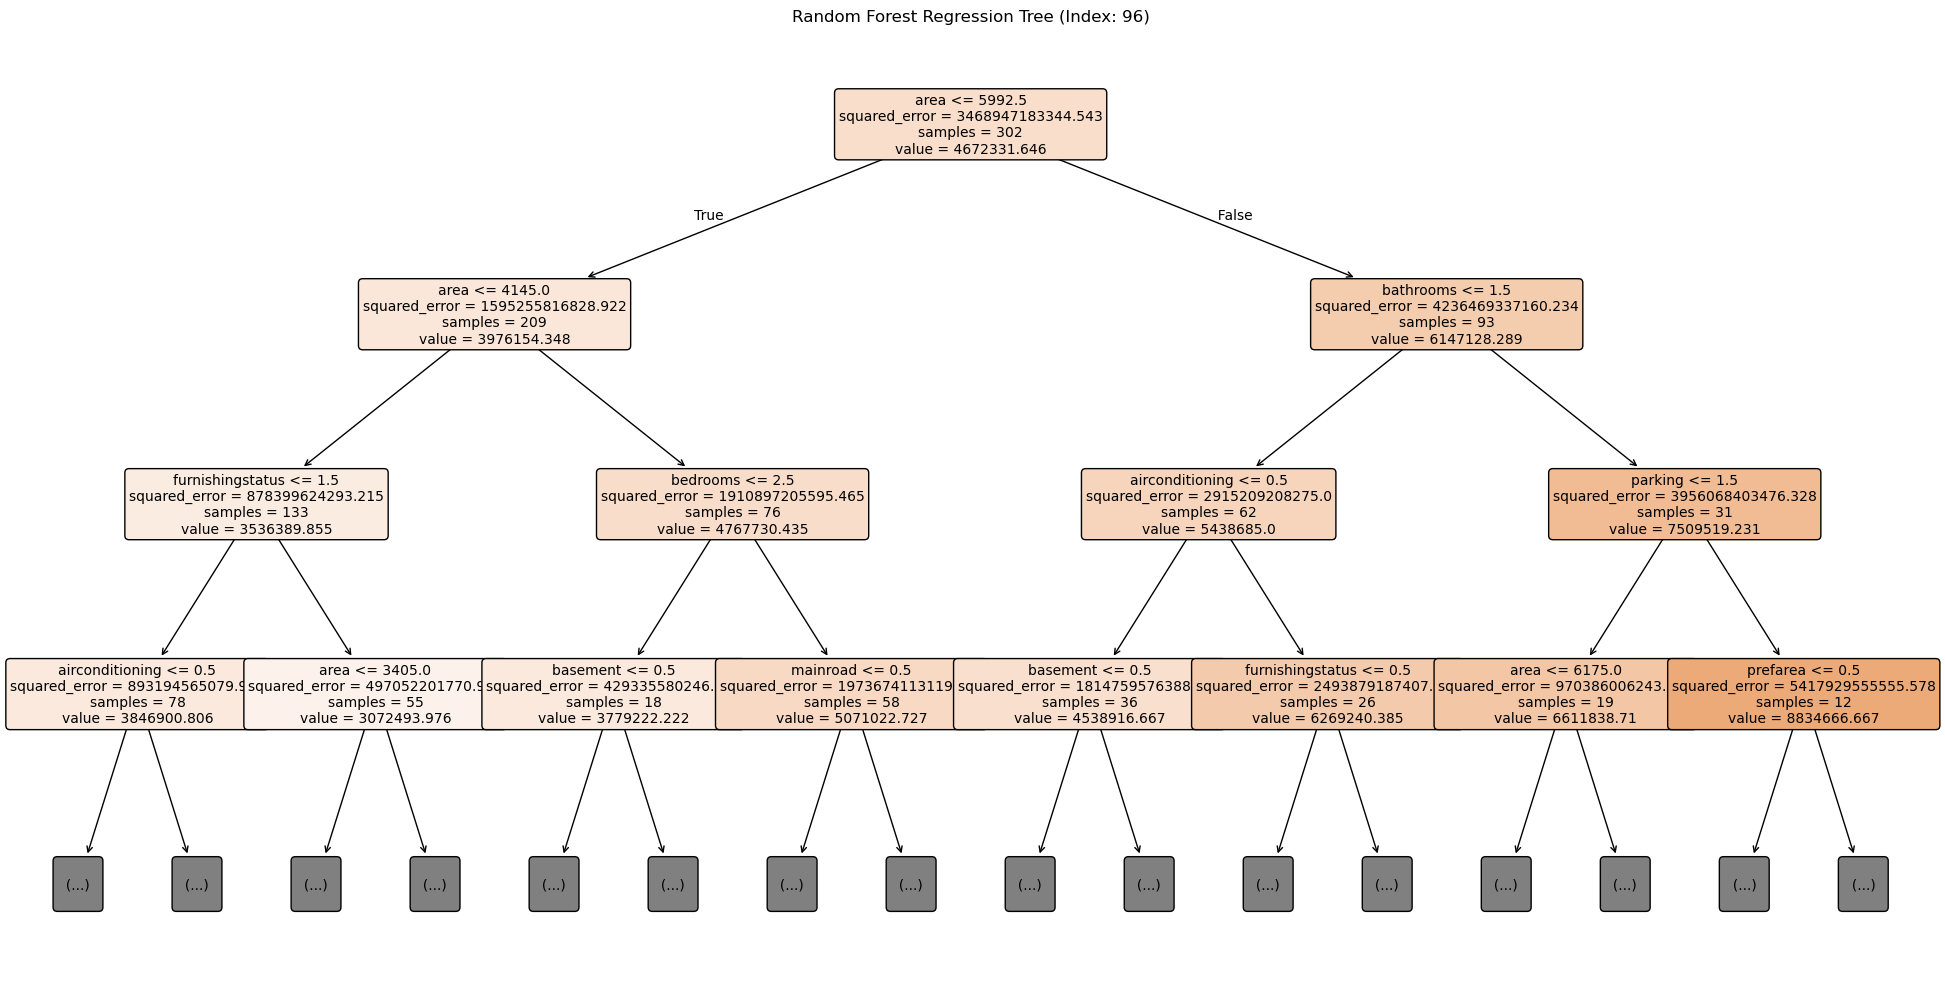

In [108]:
def visualize_tree_from_forest(rf_model, tree_index=0, max_depth=None):
   plt.figure(figsize=(20, 10))  # Reduced figure size
   
   tree_to_plot = rf_model.estimators_[tree_index]
   
   plot_tree(tree_to_plot,
             feature_names=rf_model.feature_names_in_,  
             filled=True,  
             rounded=True,
             max_depth=max_depth,
             fontsize=10)  # Added fontsize parameter
   
   plt.title(f'Random Forest Regression Tree (Index: {tree_index})')
   plt.tight_layout()  # Added for better spacing
   plt.show()
visualize_tree_from_forest(rf_model, tree_index=96, max_depth=3)   

In [ ]:
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor

# def find_best_random_state(X, y, start=0, end=100):
#     best_score = 0
#     best_state = 0
#     scores = []
    
#     for random_state in range(start, end):
#         X_train, X_test, y_train, y_test = train_test_split(
#             X, y, test_size=0.13, random_state=random_state
#         )
        
#         rf_model = RandomForestRegressor(
#             n_estimators=500,
#             max_depth=13,
#             random_state=random_state,
#             min_samples_split=7,
#             min_samples_leaf=2,
#             bootstrap=True,
#             oob_score=False
#         )
        
#         rf_model.fit(X_train, y_train)
#         score = rf_model.score(X_test, y_test)
#         scores.append(score)
        
#         if score > best_score:
#             best_score = score
#             best_state = random_state
            
#     return best_state, best_score, scores

# best_state, best_score, all_scores = find_best_random_state(X, y)
# print(f"Best random_state: {best_state}")
# print(f"Best score: {best_score:.4f}")